# Text and Speech Analysis
This notebook includes some basic examples of techniques used to analyze text and speech.

## Performing Basic Frequency Analysis
Let's start by using some very basic frequency analysis on a document to see if we can determine what the document is about  based on word frequency.

### Load a Text Document
Run the cell below to load a document and view the text it contains.

In [7]:
# Use Curl to get a document from GitHub and open it
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Moon.txt -o Moon.txt
doc1 = open("Moon.txt", "r")

# Read the document and print its contents
doc1Txt = doc1.read()
print(doc1Txt)

We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that man has made in extending his writ around this globe of ours.
There is no strife, no prejudice, no national conflict in outer space as yet. Its hazards are hostile to us all. Its conquest deserves the best of all mankind, and its opportu

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1589  100  1589    0     0   3127      0 --:--:-- --:--:-- --:--:--  3127


### Normalize the Text
Text includes a lot of punctuation, which we need to remove if we want to work only with the actual words.

Run the cell below to strip all the punctuation from the text and convert the words to lower case.

In [9]:
from string import punctuation

# remove numeric digits
txt = ''.join(c for c in doc1Txt if not c.isdigit())

# remove punctuation and make lower case
txt = ''.join(c for c in txt if c not in punctuation).lower()

# print the normalized text
print (txt)

we set sail on this new sea because there is new knowledge to be gained and new rights to be won and they must be won and used for the progress of all people for space science like nuclear science and all technology has no conscience of its own whether it will become a force for good or ill depends on man and only if the united states occupies a position of preeminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war i do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea but i do say that space can be explored and mastered without feeding the fires of war without repeating the mistakes that man has made in extending his writ around this globe of ours
there is no strife no prejudice no national conflict in outer space as yet its hazards are hostile to us all its conquest deserves the best of all mankind and its opportunity for peaceful

### Get the Frequency Distribution
Now let's tokenize the text (split it into individual words), and count the number of times each word occurs.

In [10]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(txt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
print (count_frame)

           Count
we             9
set            1
sail           1
on             2
this           5
new            5
sea            3
because        5
there          2
is             3
knowledge      1
to            11
be             5
gained         1
and           12
rights         1
won            2
they           4
must           1
used           1
for            4
the           14
progress       1
of            11
all            4
people         1
space          4
science        2
like           1
nuclear        1
...          ...
ask            1
climb          1
highest        1
mountain       1
years          1
ago            1
fly            1
atlantic       1
does           1
rice           1
play           1
texas          1
decade         1
other          1
things         1
easy           1
hard           1
serve          1
organize       1
measure        1
energies       1
skills         1
challenge      1
one            3
willing        1
accept         1
unwilling     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Visualize Word Frequency
It's often easier to analyze frequency by creating a visualization, such as a Pareto chart.

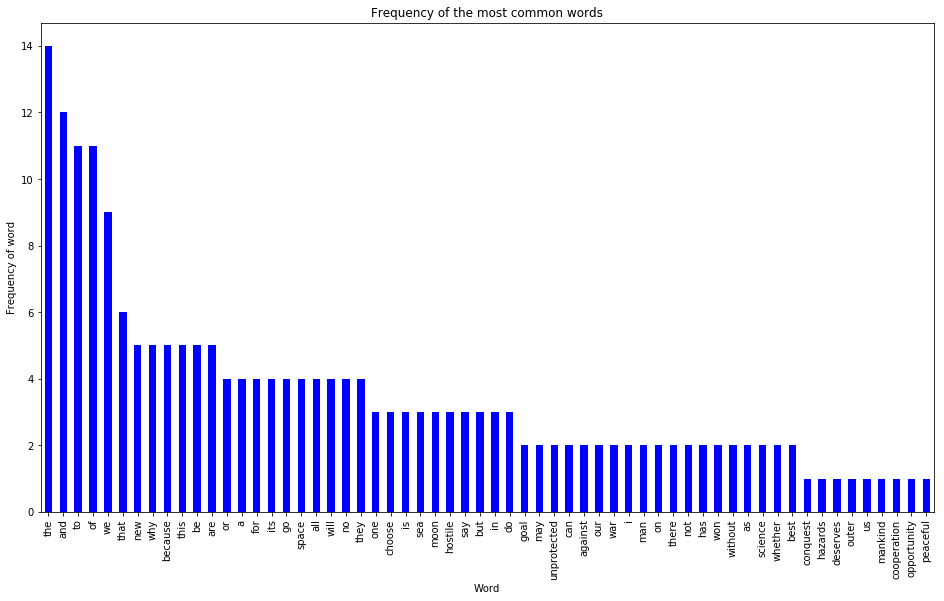

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Remove Stopwords
A large number of the words in the text are common words like "the" or "and". These "stopwords" add little in the way of semantic meaning to the text, and won't help us determine the subject matter - so run the cell below to remove them.

In [12]:
# remove stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
txt = ' '.join([word for word in txt.split() if word not in (stopwords.words('english'))])
print("\n")
print(txt)



set sail new sea new knowledge gained new rights must used progress people space science like nuclear science technology conscience whether become force good ill depends man united states occupies position preeminence help decide whether new ocean sea peace new terrifying theater war say go unprotected hostile misuse space go unprotected hostile use land sea say space explored mastered without feeding fires war without repeating mistakes man made extending writ around globe strife prejudice national conflict outer space yet hazards hostile us conquest deserves best mankind opportunity peaceful cooperation may never come say moon choose goal may well ask climb highest mountain years ago fly atlantic rice play texas choose go moon choose go moon decade things easy hard goal serve organize measure best energies skills challenge one willing accept one unwilling postpone one intend win


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Visualize the Frequency Distribution for the Remaining Words
Now that we've prepared the text, we can tokenize the string into a list of individual words, and then perform frequency analysis on those words based on how often they appear in the text.

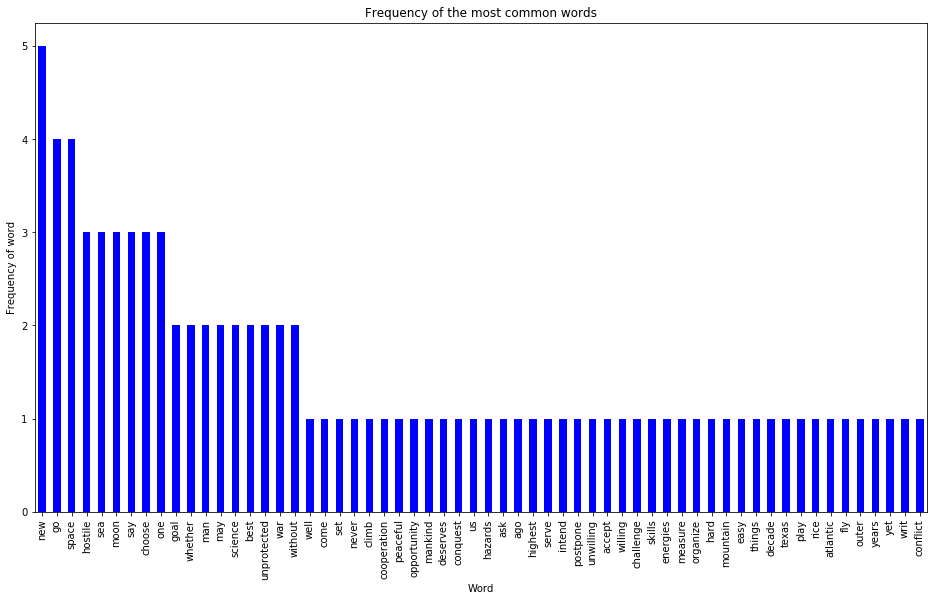

In [13]:
# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

The most frequent word is "new", and other common words include "go", "space", "science", and "moon".

## Using Term Frequency - Inverse Document Frequency
In the previous example, we've used basic term frequency to determine each word's "importance" based on how often it appears in the document. When dealing with a large corpus of multiple documents, a more commonly used technique is *term frequency, inverse document frequency* (or TF-IDF) in which a score is calculated based on how often a word or term appears in one document compared to its more general frequency across the entire collection of documents. Using this technique, a high degree of relevance is assumed for words that appear frequently in a particular document, but relatively infrequently across a wide range of other documents.

### Load and View Two More Documents
Let's add a couple more documents to our collection.

In [14]:
# remind ourselves of the first document
print(doc1Txt)
print("------------------------------------------------")

# Get a second document, normalize it, and remove stop words
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Gettysburg.txt -o Gettysburg.txt
doc2 = open("Gettysburg.txt", "r")
doc2Txt = doc2.read()
print (doc2Txt)
from string import punctuation
txt2 = ''.join(c for c in doc2Txt if not c.isdigit())
txt2 = ''.join(c for c in txt2 if c not in punctuation).lower()
txt2 = ' '.join([word for word in txt2.split() if word not in (stopwords.words('english'))])


# and a third
print("------------------------------------------------")
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Cognitive.txt -o Cognitive.txt
doc3 = open("Cognitive.txt", "r")
doc3Txt = doc3.read()
print (doc3Txt)
from string import punctuation
txt3 = ''.join(c for c in doc3Txt if not c.isdigit())
txt3 = ''.join(c for c in txt3 if c not in punctuation).lower()
txt3 = ' '.join([word for word in txt3.split() if word not in (stopwords.words('english'))])


We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that man has made in extending his writ around this globe of ours.
There is no strife, no prejudice, no national conflict in outer space as yet. Its hazards are hostile to us all. Its conquest deserves the best of all mankind, and its opportu

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1455  100  1455    0     0   2584      0 --:--:-- --:--:-- --:--:--  2584
100  1455  100  1455    0     0   2584      0 --:--:-- --:--:-- --:--:--  2584


Microsoft Cognitive Services are a set of APIs, SDKs and services available to developers to make their applications more intelligent, engaging and discoverable.
Microsoft Cognitive Services expands on Microsoft's evolving portfolio of machine learning APIs and enables developers to easily add intelligent features, such as emotion and video detection; facial, speech and vision recognition; and speech and language understanding, into their applications.
Our vision is for more personal computing experiences and enhanced productivity aided by systems that increasingly can see, hear, speak, understand and even begin to reason.


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   630  100   630    0     0    919      0 --:--:-- --:--:-- --:--:--   919
100   630  100   630    0     0    919      0 --:--:-- --:--:-- --:--:--   919


### Get TF-IDF Values for the top three words in each document
Now we'll install the **textblob** library and create some functions that we'll use to find the top 3 most important words in each document.

In [15]:
# install textblob library and define functions for TF-IDF
!pip install -U textblob
import math
from textblob import TextBlob as tb

def tf(word, doc):
    lenOfDoc = len(doc.words)
    if lenOfDoc < 1: return 0
    else: return doc.words.count(word) / lenOfDoc

def contains(word, docs):
    return sum(1 for doc in docs if word in doc.words)

def idf(word, docs):
    docsCount = contains(word, docs)
    if docsCount < 1 : return 0
    else: return math.log(len(docs) / docsCount)

def tfidf(word, doc, docs):
    return tf(word,doc) * idf(word, docs)


# Create a collection of documents as textblobs
doc1 = tb(txt)
doc2 = tb(txt2)
doc3 = tb(txt3)
docs = [doc1, doc2, doc3]

# Use TF-IDF to get the three most important words from each document
print('-----------------------------------------------------------')
for i, doc in enumerate(docs):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, doc, docs) for word in doc.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))


-----------------------------------------------------------
Top words in document 1
	Word: space, TF-IDF: 0.03231
	Word: go, TF-IDF: 0.03231
	Word: sea, TF-IDF: 0.02423
Top words in document 2
	Word: nation, TF-IDF: 0.04503
	Word: dedicated, TF-IDF: 0.03602
	Word: great, TF-IDF: 0.02702
Top words in document 3
	Word: services, TF-IDF: 0.05782
	Word: microsoft, TF-IDF: 0.03855
	Word: cognitive, TF-IDF: 0.03855


## Stemming
Until now, we've simply counted the number of occurrances of each word. This doesn't take into account the fact that sometimes multiple words may be based on the same common base, or *stem*; and may be semantically equivalent. For example, "fishes", "fished", "fishing", and "fisher" are all derived from the stem "fish".

### View frequency of words from Kennedy's inauguration speech
Let's look at another document and count the unstemmed words it contains.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15234  100 15234    0     0  66524      0 --:--:-- --:--:-- --:--:-- 66524


Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens:
We observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn before you and Almighty God the same solemn oath our forebears prescribed nearly a century and three-quarters ago.
The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.
We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation of Am

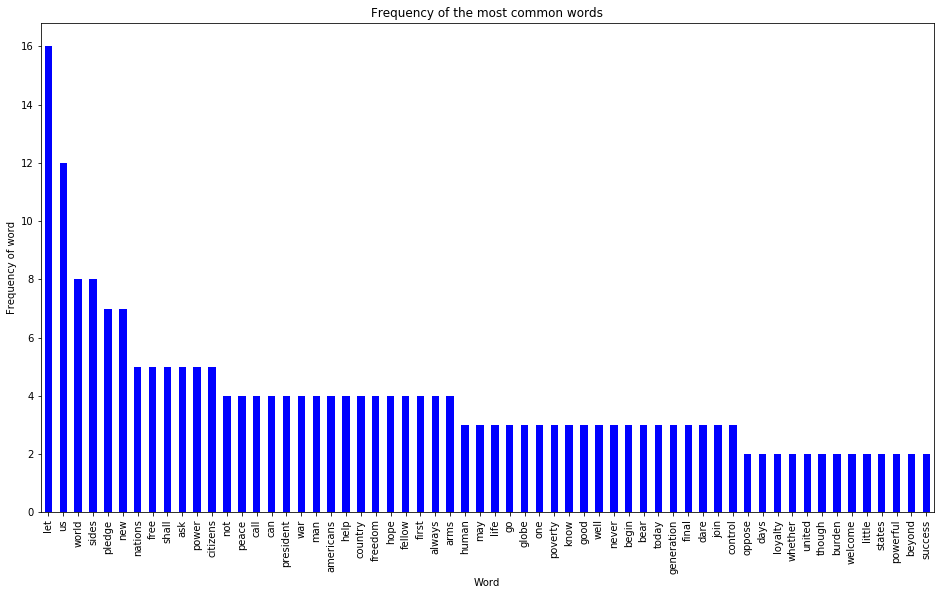

In [16]:
# Load and print text
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Inaugural.txt -o Inaugural.txt
doc4 = open("Inaugural.txt", "r", encoding="utf-16")
doc4Txt = doc4.read()

print(doc4Txt)

# Normalize and remove stop words
from string import punctuation
doc4Txt = ''.join(c for c in doc4Txt if not c.isdigit())
doc4Txt = ''.join(c for c in doc4Txt if c not in punctuation).lower()
doc4Txt = ' '.join([word for word in doc4Txt.split() if word not in (stopwords.words('english'))])

# Get Frequency distribution
words = nltk.tokenize.word_tokenize(doc4Txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Stem the words using the Porter stemmer
Now let's stem the words and count the stems.

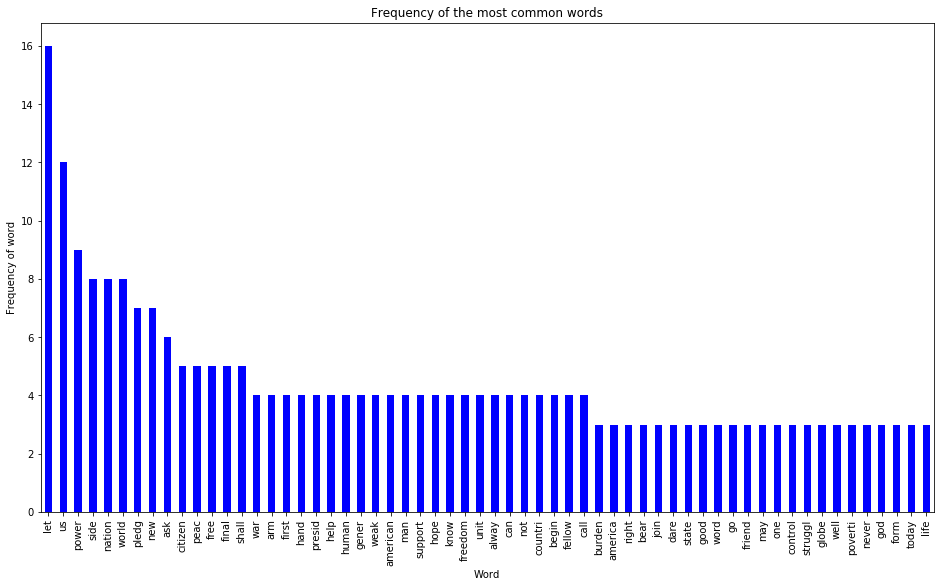

In [17]:
from nltk.stem.porter import PorterStemmer

# Get the word stems
ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

Compare the frequencies of the stems to the unstemmed words. Note in particular that the unstemmed words include "power", "powers", and "powerful", which are all stemmed to "power". Additionally, the text includes "nations" and "nation" - which also have a common stem.

## Using the Text Analyics Cognitive Service
The previous examples demonstrate some ways to write code and analyze text, and they serve to illustrate that text analytics involves applying statistical techniques to text data in order to discern semantic meaning. This is a common theme in many AI solutions.

Microsoft Cognitive Services includes a Text Analytics service that encapsulates much more sophisticated techniques for ascertaining meaning from text.

### Create a Text Analytics Service
First, you need to provision a Text Analytics service in your Azure subscription. Follow these steps to do that:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and search for "**Text Analytics**".
4. In the list of services, click **Text Analytics**.
5. In the **Text Analytics API** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Location**: Choose the Azure datacenter location where you want to host your service.
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you created in the previous lab (or create a new one if you didn't complete the previous lab)
7. Wait for the service to be created.
8. When deployment is complete, click **All Resources** and then click your Text Analytics service to open its blade.
9. In the blade for your Text Analytics service, click **Keys** and then copy **Key 1** to the clipboard.
10. In the cell below, set the **textAnalyticsURI** variable to use the location where you provisioned your Text Analytics service (for example, *eastus2*), and paste the key you copied into the **textKey** variable assignment value.
11. Run the cell below to create an instance of the Text Analytics service.

In [18]:
textAnalyticsURI = 'YOUR_REGION.api.cognitive.microsoft.com'
textKey = 'YOUR_KEY'

print("Ready to use Text Analytics API")

Ready to use Text Analytics API


### Call the Text Analytics Service to Determine Key Phrases in the Documents
One of the methods provided by the Text Analytics service is the ability to extract a list of key phrases from text documents, which give an insight into the core topics discussed in the document.

Run the following cell to call the **keyPhrases** method of the Text Analytics service and extract the key phrases for the text documents you have loaded so far in this notebook.

In [19]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, json, urllib

# Define the request headers.
headers = {
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': textKey,
    'Accept': 'application/json'
}

# Define the parameters
params = urllib.parse.urlencode({
})

# Define the request body
body = {
  "documents": [
    {
        "language": "en",
        "id": "1",
        "text": doc2Txt
    },
    {
        "language": "en",
        "id": "2",
        "text": doc3Txt
    }
  ]
}

try:
    # Execute the REST API call and get the response.
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/keyPhrases?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read().decode("UTF-8")

    # 'data' contains the JSON response, which includes a collection of documents.
    parsed = json.loads(data)
    for document in parsed['documents']:
        print("Document " + document["id"] + " key phrases:")
        for phrase in document['keyPhrases']:
            print("  " + phrase)
        print("---------------------------")
    conn.close()

except Exception as e:
    print('Error:')
    print(e)

Error:
[Errno 11001] getaddrinfo failed


From these key phrases, it's reasonably clear that the first document is about the advancement of science and space exploration, the second is about freedom and nationhood, and the third is about software services for AI.

### Perform Sentiment Analysis
Another common AI requirement is to determine the sentiment associated with some text. For example, you might analyze tweets that include your organization's twitter handle to determine if they are positive or negative.

Run the cell below to use the **sentiment** method of the Text Analytics service to discern the sentiment of two sentences.

In [ ]:
body = {
  "documents": [
    {
      "language": "en",
      "id": "1",
      "text": "Wow! cognitive services are fantastic."
    },
    {
      "language": "en",
      "id": "2",
      "text": "I hate it when computers don't understand me."
    }
  ]
}


try:
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read().decode("UTF-8")
    parsed = json.loads(data)
    
    # Get the numeric score for each document
    for document in parsed['documents']:
        sentiment = "negative"
        
        # if it's more than 0.5, consider the sentiment to be positive.
        if document["score"] >= 0.5:
            sentiment = "positive"
        print("Document:" + document["id"] + " = " + sentiment)
    conn.close()
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))


## Working with Speech
So far, we've seen how analyze text; but increasingly AI systems enable humans to communicate with software services through speech recognition.

Let's start by installing the speech SDK.

In [20]:
!pip install azure.cognitiveservices.speech

### Create a Speech Service
The Microsoft Cognitive Services include the Speech service, that can interpret spoken input from a microphone or audio file. Follow these steps to provision the Speech service:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and search for "**Speech**".
4. In the list of services, click **Speech**.
5. In the **Speech** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Location**: Any available region (you'll need this in the code below).
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you used previously.
7. Wait for the service to be created.
8. When deployment is complete, click **All Resources** and then click your Speech service to open its blade.
10. In the blade for your Speech service, click **Keys** and then copy **Key 1** to the clipboard.
11. In the cell below, set the **speech_region** variable to the location where you provisioned your Speech service (for example, *eastus2*), and paste the key you copied into the **speech_key** variable assignment value.
11. Run the cell below to create a configuration object for your speech service.

In [ ]:
from azure.cognitiveservices.speech import SpeechConfig

speech_region = 'REGION' # Or the region you specified
speech_key = 'YOUR_KEY'

speech_config = SpeechConfig(speech_key, speech_region)
print("Speech service ready in", speech_config.region)

### Listen to the Speech
In this exercise, you will use a .wav audio file. To hear the speech you will analyze, run the cell below (this assumes you have audio capabilities in your computer!)

In [21]:
import IPython

!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/RainSpain.wav -o RainSpain.wav

IPython.display.Audio('RainSpain.wav', autoplay=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  648k  100  648k    0     0  1007k      0 --:--:-- --:--:-- --:--:-- 1009k


### Call the Speech Service to Transcribe the Audio
Hopefully you understood what was said in the audio file.

Let's see how the Speech service does!

In [ ]:
from azure.cognitiveservices.speech import SpeechRecognizer, AudioConfig

# Configure audio to use .wav file as source (default is primary microphone)
audio_config = AudioConfig(filename="RainSpain.wav")

# Create a speech recognizer
speech_recognizer = SpeechRecognizer(speech_config,audio_config)

# Use a one-time, synchronous call to transcribe the speech
speech = speech_recognizer.recognize_once()
print(speech.text)

## Using the Language Understanding Intelligence Service (LUIS)
Increasingly, we expect computers to be able to use AI in order to understand spoken or typed commands in natural language. For example, we want to be able to say "switch on the light" or "put the light on", and have an AI-powered device understand the command and take appropriate action.

### Provision the Language Understanding Intelligence Service (LUIS)
The Microsoft cognitive services include the Language Understanding Intelligence Service (LUIS), which enables you to define *intents* that are applied to *entities* based on *utterances*.

To get started with LUIS, follow these steps to provision the service in your Azure subscription:
1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and search for **Language Understanding**.
4. In the list of services, click **Language Understanding**.
5. In the **Language Understanding** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Location**: Choose a location in the US.
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you used previously.
7. Wait for the service to be created.

### Create a LUIS App
To implement natural language understanding with LUIS, you must first create an app; and then add intents, utterances, and entities to define the commands you want the app to understand.
1. Open a new browser tab and navigate to https://www.luis.ai/.
2. Sign in using the Microsoft account associated with your Azure subscription. If this is the first time you have signed into LUIS, you may need to grant the app some permissions to access your account details, and then fill in some information and accept the terms of use.
3. If a message prompting you to complete a tutorial in which you will create a *Scheduler* app is displayed, close it (you can complete this tutorial later - for now, we'll focus on a simpler example).
4. Click **Create New App** and create a new app with the following settings:
  * **Name**: Simple Home Automation
  * **Culture**: English
  * **Description**: A basic home automation example
  
 ### Create an Entity and Intents
1. In the LUIS page for your app, in the pane on the left, click **Entities**. Then click **Create new intent**, and create a new *simple* entity with the name **Light**.
2. In the pane on the left, click **Intents**. Then click **Create new intent**, and add an intent with the name **Light On**.
3. In the **Utterances** page for the **Light On** intent, type "*turn the light on*" and press **Enter** to add this utterance to the list.
4. In the list of utterances, in the *turn the light on* utterance, hold the mouse over the word "light" so that the list shows the value *turn the [light] on*. Then click **[light]** select the *Light* entity you created previously.
5. In the pane on the left, click **Intents** and click **Create new intent**, to add a second intent with the name **Light Off**.
6. In the **Utterances** page for the **Light Off** intent, type "*turn the light off*" and press **Enter** to add this utterance to the list.
7. In the list of utterances, in the *turn the light on* utterance, hold the mouse over the word "light" so that the list shows the value *turn the [light] on*. Then click **[light]** select the *Light* entity you created previously.

### Train and Test the Model
1. At the top of the LUIS page for your app, click **Train** to train the application
2. After the app has been trained, click **Test**, and then in the test pane, enter the following utterances and verify that they are correctly interpreted as commands for the *Light On* and *Light Off* intents as appropriate:
    * *turn on the light*
    * *put the light off*
    * *switch the light on*
    * *switch off the light*
    
### Publish the Model and Configure Endpoints
1. At the top of the LUIS page for your app, click **Publish**. Then ensure that the **Production** slot is selected and click **Publish**.
2. After the model has been published, at the top of the LUIS page for your app, click **Manage**. Then on the **Application Information** tab, note the **Application ID** for your app.
3. On the **Keys and Endpoints** tab, note that a **Starter_Key** resource has been created for you. You can use this for basic testing, but for full functionality, you should assign a LUIS resource from your Azure subscription to this model.
4. Click **Assign Resource**, and then in the **Assign a resource to your app** dialog box, select the following settings and click **Assign resource**:
  * **Tenant name**: *Your Azure tenant*
  * **Subscription name**: *Your Azure subscription*
  * **LUIS resource name**: *The LUIS resource you provisioned in the Azure portal*
  
  
5. When the new resource is added, note its **Key 1** and **Endpoint** values - you'll need these later!
  

### Consume the LUIS App
Now that you have published your LUIS app, you can consume it from a client application.

We'll start by installing the LUIS SDK for Python

In [ ]:
!pip install azure-cognitiveservices-language-luis

Now you're amost ready to call the endpoint for your LUIS application. You just need to modify the following variables in the cell below to match the settings for your LUIS app:

* **luis_app_id** = *The Application ID for your LUIS app*
* **luis_key** = *The **Key 1** property for the resource you added*
* **luis_region** = *The region in the **Endpoint** for the resource you added (for example, **westus**)*

Then run the cell, and enter a command when prompted to call your service and interpret the command. The entities and most likely intent predicted for each comand is shown with an appropriate image.

Try the following commands:
* *Switch on the light*
* *Turn on the light*
* *Turn off the light*
* *Could you put the light on please?*

In [ ]:
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

# Set up API configuration
luis_app_id = "YOUR APP_ID"
luis_key = "YOUR_KEY"
luis_region = "REGION"

luis_endpoint = "https://" + luis_region + ".api.cognitive.microsoft.com"

luis_credentials = CognitiveServicesCredentials(luis_key)

# prompt for a command
command = input('Please enter a command: \n')

luis_client = LUISRuntimeClient(luis_endpoint, luis_credentials)
data = luis_client.prediction.resolve(luis_app_id, command)
intent = data.top_scoring_intent.intent
print("Entities:")
for entity_details in data.entities:
    print("\t", entity_details.entity)
print("Intent:", intent)

# Take the appropriate action
if (intent == "Light On"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.jpg'
elif (intent == "Light Off"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.jpg'
else:
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Dunno.jpg'

# Get the appropriate image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)


## Combining Speech Recognition and Natural Language Understanding
An obvious next step is to combine speech recognition with natural language understanding so that a spoken command can be interpreted and the appropriate action taken.

### Enable Speech Priming
1. In the LUIS page for your application, click **Manage** and then view the **Publish Settings** page.
2. Select the **Enable speech priming...** option.
3. Click **Publish** to republish your application to the **Production** environment.

### Download Command Audio
Now let's download and play some spoken commands for our home automation system. Run the two cells under this to hear the commands.

In [ ]:
import IPython

# Get the "lights on" command
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.wav -o LightOn.wav
    
IPython.display.Audio('LightOn.wav', autoplay=True)

In [ ]:
# Get the "lights on" command
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.wav -o LightOff.wav
    
IPython.display.Audio('LightOff.wav', autoplay=True)

### Use the Speech SDK with LUIS to predict intents
Run the code in the following cell to use the speech SDK with your LUIS application to detect the intent from the *LightOn.wav* audio file.

In [ ]:
from azure.cognitiveservices.speech.intent import IntentRecognizer, LanguageUnderstandingModel

command_file = "LightOn.wav"

# Configure audio to use .wav file as source (default is primary microphone)
audio_intent_config = AudioConfig(filename=command_file)

# Set the intent config to use our LUIS service
speech_intent_config = SpeechConfig(subscription=luis_key, region=luis_region)

# Create a speech recognizer
intent_recognizer = IntentRecognizer(speech_config=speech_intent_config, audio_config=audio_intent_config)

model = LanguageUnderstandingModel(app_id=luis_app_id)

intents = [
        (model, "Light On"),
        (model, "Light Off"),
    ]

intent_recognizer.add_intents(intents)

intent_result = intent_recognizer.recognize_once()

intent = intent_result.intent_id
print(intent)

# Perform the appropriate action
if (intent == "Light On"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.jpg'
elif (intent == "Light Off"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.jpg'
else:
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Dunno.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)

### Transcribe and Interpret the "Light Off" Command
Modify the cell above to set the **command_file** variable to `data/LightOff.wav`, and then run the cell again to test it